## Project 2 - Elaine Keung

### Scientific Question
#### Similar to how human coronavirus (SARS-CoV-2) has been shown to been evolved from bat coronavirus, can the same be said for common human influenza and bat influenza? That is, if they are related, could a bat be infected by human influenza or the other way around? Of the hosts of other influenzas that humans are known to be affected by, specifically swine or avian, would human influenza be able to infect any of those species?

In studying SARS-CoV-2 in humans, researchers have found a close genomic relationship to SARSr-Rp-BatCoV-ZXC21/ZC45 from Rhinolophus pusillus bats. Additionally, the receptor-binding domain has a potential relationship to coronaviruses affecting pangolins. (Lau et al., 2020) 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7323513/
The relationship between these different species of viruses was determined through sequence comparison of the genome and amino acid residues of the spike protein. Both the virus and the relevant proteins of another virus, influenza, have been extensively studied. Each virus has a specific genome and variation of protein, however there may be evolutionary relationships between the different viruses.

One vital protein to the function of influenza viruses is hemagglutinin. Hemagglutinin (HA) is a protein that causes inflammation, and it is important for the binding of the influenza virus onto host cells. If the hemagglutinin of different influenza viruses have significant similarities, this may suggest that the influenza virus that normally affects on species may be able to affect humans. 

The database used in this project is mostly the NCBI protein database. The website states it as "The Protein database is a collection of sequences from several sources, including translations from annotated coding regions in GenBank, RefSeq and TPA, as well as records from SwissProt, PIR, PRF, and PDB. Protein sequences are the fundamental determinants of biological structure and function." Each entry contains the amino acid sequence, as well as several figures of the protein, both 2D and 3D. 
https://www.ncbi.nlm.nih.gov/protein

### Scientific Hypothesis
#### If there are similarities in the structures and residues between the hemagglutinin proteins of human and bat (and/or swine, bird) influenzas, then the influenza viruses could be related and affect the other species.

The hemagglutinin proteins of several viruses was saved from NCBI as FASTA files: 4H32 (bat), 1RUY (swine), 4BSI (avian), and 2YP7 (human). These are loaded in as sequences and then aligned compared to human HA with pairwise sequence alignments. Pairwise sequence alignments would show the similarities between two of the hemagglutinin sequences. This information can show how similar in general the sequences are, whether there are segments that are particularly similar, and compare similarities between different pairs of hemagglutinin. 

It is also important to take into account the 3D structure of these proteins. As such, I have also used PyMOL to visualize the proteins to look for visual similarities, as this may give more information that the structures alone do not give.

The alignments are analyzed based on the alignment score. The alignments are also plotted onto a heat plot to visualize the magnitude of the similarities.

To answer my question and test my hypothesis, I have downloaded and loaded in the following protein chains from NCBI:

1. 4H32 Chain H - bat hemagglutinin

2. 1RUY Chain M - swine hemagglutinin

3. 2YP7 Chain A - human hemagglutinin

4. 4BSI Chain B - avian hemagglutinin

## Part 1: Load the Packages
The following packages were used: 

Bio - Biopython, the general package for biological computations. Here, specific subpackages from Biopython are used. https://biopython.org/

SeqIO - Sequence Input/Output is a package that is able to manipulate sequence data. First, SeqIO is used to read in sequence files downloaded from NCBI with the read function, with file format (in this project, fasta) specified. SeqIO can also be used to output files. Some of the functions SeqIO can perform are reading in files, parseing files (will return an iterator, if the file has multiple sequences), and converting file types. SeqIO requires the file type to be specified. https://biopython.org/wiki/SeqIO

Seq - After the sequences are loaded in, they can be converted to .seq objects, which allows some more functions to be performed onto them, such as reverse_complement, or translate. The Seq object is generally like a string, and can have string functions performed on it. After the sequences here are loaded in with SeqIO, they are changed into seq objects. This is done to take the identification tag off of the top of the sequence and just be left with the sequence so it can be more properly aligned. More information on the Seq object can be found at https://biopython.org/wiki/Seq.

pairwise2 - pairwise2 is the Biopython subpackage for pairwise sequence alignments. The package has functions that can perform both global and local alignments. Global alignments look at the whole sequence while local alignments only looks at similar subsequences. The alignment function is in the align object, which can be formatted with format_alignment. The gap penalties and match scores can be specified with x, m, d, c in the two letters after the global or local keyword ("globalxx", "globalms", etc). Other arguments that can be specified are to only return the alignment score, which can be done with score_only = True. More info on pairwise2 can be found at https://biopython.org/docs/1.75/api/Bio.pairwise2.html.

BLAST - BLAST is a subpackage of Biopython capable of running a BLAST search on the NCBI database online. The function takes in inputs specifying which kind of BLAST (nucleotide, protein, etc), from what database, the intended sequence, and more adjustments. The output from the BLAST search can be put into a file to view. BLAST can be run locally without the internet if the BLAST database is on the computer itself. This is an alternative to running BLAST on the NCBI website. More information can be found at the website, https://biopython.org/docs/1.75/api/Bio.Blast.html as well as at NCBI's BLAST page: https://blast.ncbi.nlm.nih.gov/Blast.cgi.

Matplotlib - Matplotlib is a package for visualizing data. The plots created can have the axes and layout customized. Some of the basic plots it is able to create include line, scatter, and histograms. However, it is also able to create dot plots and heat plots, which are more relevant to this project. These plots can be created based on numpy arrays. More information on Matplotlib can be found at its website, https://matplotlib.org/stable/index.html.

NumPy - NumPy is a package to perform a variety of statistical computations. One useful aspect of NumPy is the array object, which is used as opposed to a standard Python list. One difference is that NumPy arrays can be subset with booleans. NumPy arrays can also be 2D, containing a list of lists. It can also perform statistical functions on the data in the arrays. NumPy is used to create the arrays to hold the data needed to create the plots with Matplotlib. More information can be found at https://numpy.org/.

PyMOL (not directly used in code) - PyMOL is a visualizer for molecules and proteins. It is able to fetch data from databases such as RCSB PDB (https://www.rcsb.org/) and generate an image of the protein in a 3D space. It has a variety of tools that can help analyze a structure, such as isolating certain parts. It is also capable of animating the structure. PyMOL is available as an individual program but can also be integrated into Python code with Anaconda, although not used in this project. More information on PyMOL can be found at its website, https://pymol.org/2/.

In [25]:
# import packages
import Bio
from Bio import SeqIO # reading in sequence files 
from Bio.Seq import Seq # convert to Seq object for biological computation/functions
from Bio import pairwise2 # perform pairwise alignments
from Bio.pairwise2 import format_alignment # format printing of alignments
from Bio.Blast import NCBIWWW # perform BLAST search
import numpy as np # create array to hold alignment scores for heat plot
import matplotlib.pyplot as plt # create heat plot

## Part 2: Load in the data and perform Bioinformatics Analyses (Pairwise sequence alignment, BLAST)
The data files are downloaded from NCBI in FASTA format and loaded in with SeqIO. FASTA files are frequently used to store DNA nucleotide sequences or amino acid sequences in one letter codes, as well as identification information. 

The bioinformatics method utilized is pairwise sequence alignments, which takes in two sequences and algorithmically aligns them to try and optimize an alignment score. The alignment score is assigned based on several conditions, depending on whether each unit in the sequences match or mismatch. Typically, a score of +1 is assigned to matches. Gap penalties can be assigned where if the sequences do not match because of an offset (a "gap" in one of the sequences), the alignment score will be penalized. The pairwise function is formatted as follows:
pairwise2.align.globalxx(x, y, (other arguments))

where all alignments will fall under the "align" object. "global" is interchangable with "local", which will look for specifically similar segments rather than aligning the entire sequence. The "xx" are parameters for the matches and gap penalties. The inputs can be strings, or in this case, sequences. Following the input of two strings/sequences, there are more specifications for the function. One of them is "score_only", which will return only the alignment score rather than a detailed output showing how the nucleotides/residues align. This allows for more simple and direct interpretation of the results, as a higher score generally means a better alignment (more matches). These scores can also be output to an array to be plotted on a dot plot or heat plot. 

In the code below, four hemagglutinin proteins are loaded in and converted to Seq objects. Then, a function is created to align two sequences. A loop is created to iterate through each pair of the sequences and align the sequences, as well as output the alignment scores to an array to prepare for a heat plot.

BLAST searches follow a similar algorithm to pairwise sequence alignments, although on a much larger scale. The sequence in question is compared to a database, which will show the highest scoring alignments across many proteins. This can be used to find similar proteins or also look at conserved common sections within nucleotide or amino acid sequences. 

In the code below, BLAST is run on the four sequences, the goal of which is to look at the results of the search and see what other species' hemagglutinin comes up as similar. Additionally, it is to see whether bat/swine/human/avian comes up in the BLAST search with a fairly high similarity. The outputs are sent to .xml files. 

Throughout the code, both local and global variables are used. Global variables are initialized in the main body of the code (not within a function) and can be used everywhere throughout the code, whether inside of a function or just outside later in the code. Local variables, on the other hand, are exclusive to the function that they are created in. If a variable is not returned from the function, it cannot be used outside of the function. 

A special case is with loops such as for loops, which use an iteratable variable. These are intended to be exclusively used to progress the for loop, and are not used outside of the loop, making them local to the loop.

In [10]:
# load sequences
# sequences are downloaded from NCBI in FASTA format, specified to the function in the arguments
# all of these are global variables
bat_HA = SeqIO.read("4H32_H", "fasta")
swine_HA = SeqIO.read("1RUY_M", "fasta")
human_HA = SeqIO.read("2YP7_A", "fasta")
avian_HA = SeqIO.read("4BSI_B", "fasta")

# testing print of variable
# print(bat_HA)

In [11]:
# convert to seq object
# allows for more biological computation functions
# all of these are global variables
bat_HA_seq = bat_HA.seq
swine_HA_seq = swine_HA.seq
human_HA_seq = human_HA.seq
avian_HA_seq = avian_HA.seq

# testing print of variable
# print(bat_HA_seq)

In [37]:
# BLAST search for similar HA
# run the BLAST search for proteins, from non-redundant protein sequences (nr) database, on human hemagglutinin
# variable human_result is global
human_result = NCBIWWW.qblast("blastp", "nr", human_HA_seq)
# write the BLAST result to a file
with open("humanHAblast.xml", "w") as save_to:
    save_to.write(human_result.read())
    human_result.close()

The output of the BLAST search includes the following:
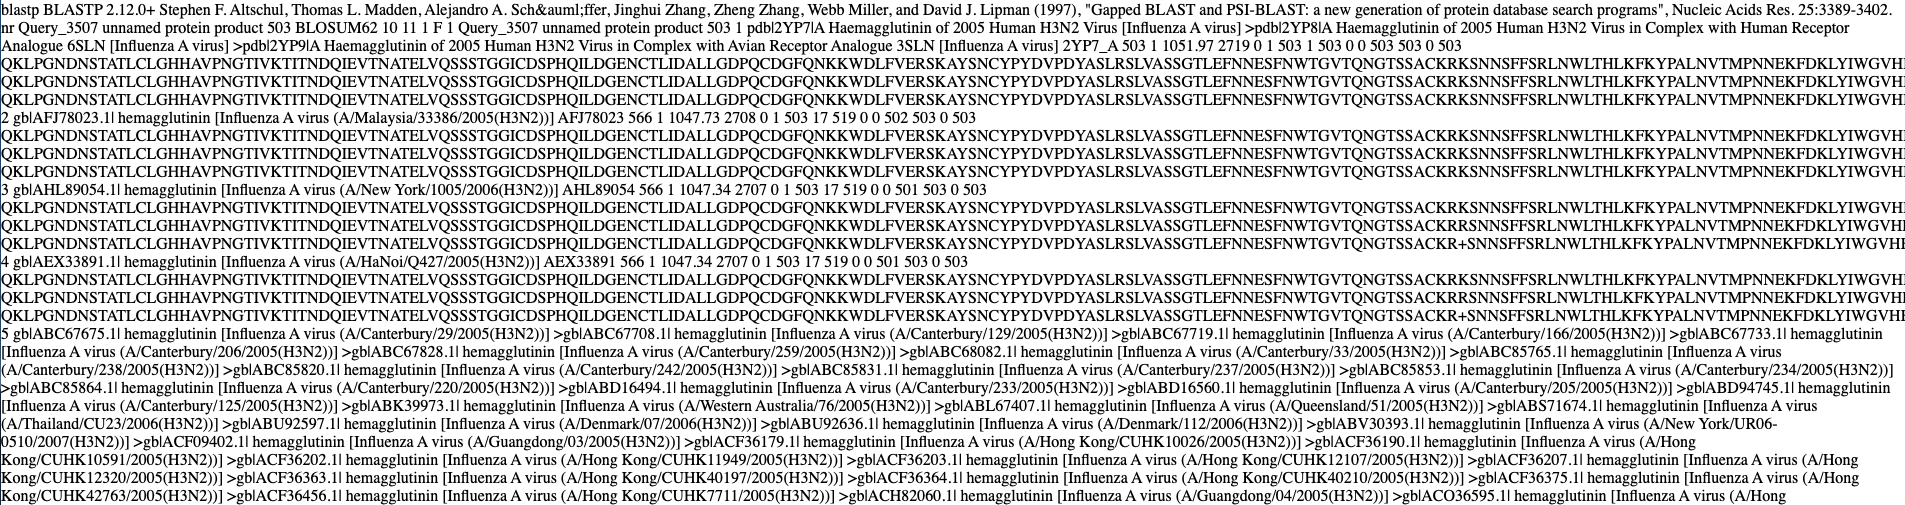

In [34]:
# run BLAST on the remaining HA
# bat BLAST
bat_result = NCBIWWW.qblast("blastp", "nr", bat_HA_seq)
with open("batHAblast.xml", "w") as save_to:
    save_to.write(bat_result.read())
    bat_result.close()

In [35]:
# swine BLAST
swine_result = NCBIWWW.qblast("blastp", "nr", swine_HA_seq)
with open("swineHAblast.xml", "w") as save_to:
    save_to.write(swine_result.read())
    swine_result.close()

In [33]:
# avian BLAST
avian_result = NCBIWWW.qblast("blastp", "nr", avian_HA_seq)
with open("avianHAblast.xml", "w") as save_to:
    save_to.write(avian_result.read())
    avian_result.close()

In [22]:
# creating placeholder variables
# all of these are global variables

# create a list to hold the four sequences
# this is to be able to iterate through later
HA_list = [bat_HA_seq, swine_HA_seq, human_HA_seq, avian_HA_seq] 

# create a list to hold labels for the sequences
HA_name = ["Bat HA", "Swine HA", "Human HA", "Avian HA"]

# take the size of the list so the array is the correct size
size = len(HA_list)

# create an empty array to hold all the alignment scores
# size is used, array will hold grid of exact number of sequences that are being aligned/will have data
score_array = np.empty(shape=(size, size)) 

In [39]:
# create a function to perform the full sequence alignment of two sequences and print it
# takes in two sequences and performs pairwise alignment
def alignHA(seq1, seq2):
    # alignment function, no gap penalties, no special parameters, global alignment for whole sequence
    # alignment (the variable) is local to this function, as it is just printed but not returned
    alignment = pairwise2.align.globalxx(seq1, seq2)
    # print the alignment
    for a in alignment:
        print(format_alignment(*a))
        
# test the function
# alignHA(bat_HA_seq, avian_HA_seq)

In [42]:
# performing all alignments
# use the function with a loop to iterate through all combinations of the alignments
# initialize variables in for loop
# i and j are local to the loop (for iteration) 
# i = 0
# j = 0
for i in range(size):
    for j in range(size):
        # iterates i first ("row"), then goes through all possible options of j ("columns") 
        # first value in HA_list is bat_HA_seq = i, then j will be bat > swine > human > avian
        # then i will iterate to swine, repeat
        alignHA(HA_list[i], HA_list[j])
        # calling function works and prints results, not shown for length

In [24]:
# create a function to hold the sequence alignment scores and print them
# initialize variables in for loop
# i and j are local to the loop (for iteration) 
# i = 0
# j = 0

# arguments take an array (to be filled) and a size for the iterated list
def heatmap(align_array, size): 
    # iterate through the list of sequences
    for i in range(size): 
        for j in range(size):
            # each entry in the list is assigned to a temporary variable X/Y
            # X and Y are local to this function, they are not returned
            X = HA_list[i] 
            Y = HA_list[j]
            
            # perform the alignment with no gap penalties, no special parameters
            # only return the score
            # insert scores into array
            align_array[i,j] = int(pairwise2.align.globalxx(X, Y, score_only=True))
    
    # return the array, filled with the score values
    return align_array

# use the function to fill the empty score_array with the alignment scores
# HA_score_array is global
HA_score_array = heatmap(score_array, size) 
print(HA_score_array)
# [[bat/bat, bat/swine, bat/human, bat/avian]
#  [swine/bat, swine/swine, swine/human, swine/avian]
#  [human/bat, human/swine, human/human, human/avian]
#  [avian/bat, avian/swine, avian/human, avian/avian]]

[[171. 110. 107.  91.]
 [110. 160. 111. 102.]
 [107. 111. 503. 126.]
 [ 91. 102. 126. 177.]]


## Part 3A: Create a heatmap (plotting method) to show the alignment similarities
A heatmap/heat plot is a visual plotting method that is able to show the relative intensity of something between different variables. For example, one common use of heatmaps is to show gene expression across different cells. In this case, it is used to show the alignment scores of the sixteen alignments between the influenza hemagglutinins. Heat plots show data in a grid with a color scale, with different colors representing different magnitudes of occurance. In this plot, the colors range from dark purple to bright yellow, representing low to high alignment scores. Along the diagonal from top left to bottom right are four particularly light squares, however these represent alignments to the same sequence. 

Here, the alignment score array is plotted as a heatmap, then axes, a color bar, a title, and tick labels are added to show which spot in the grid refers to which alignment. 

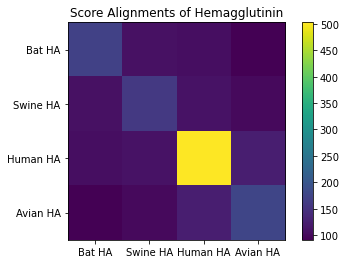

In [8]:
# creating and showing a heatplot of the sequence alignment scores 
# create subplot
fig, ax = plt.subplots()

# show the heatplot using data from the function that returns the score array
plt.imshow(HA_score_array)

# show the axes on the heatplot
im = ax.imshow(HA_score_array)

# add a colorbar to the right of the heatmap
cbar = ax.figure.colorbar(im)

# add title
plt.title("Score Alignments of Hemagglutinin")

# add tick labels 
# range is used to set ticks on axes to number of influenzas (4), then each tick is labeled with appropriate name
plt.xticks(range(len(HA_name)), HA_name) 
plt.yticks(range(len(HA_name)), HA_name)

# show plot
plt.show()

## Part 3B: PyMOL Visualization to show structural similarities

PyMOL is a molecular visualization software that has a variety of functions able to display, animate, compare (and more) molecules and proteins. PyMOL can take proteins directly from databases such as RCSB PDB. Here it is used to display the structures of the proteins analyzed through sequence, to see whether the structures may support or conflict with the results from the sequence analysis. Of note in these structures are the positions of the long alpha helix coils. The following images show:

1. Left: 4BSI (Avian), Right: 2YP7 (Human)
2. Left: 4H32 (Bat), Right: 4BSI (Avian)
3. Left: 4H32 (Bat), Right: 1RUY (Swine)

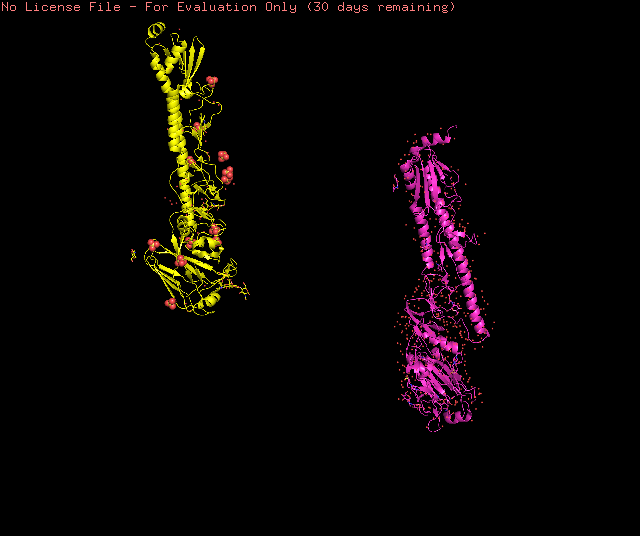

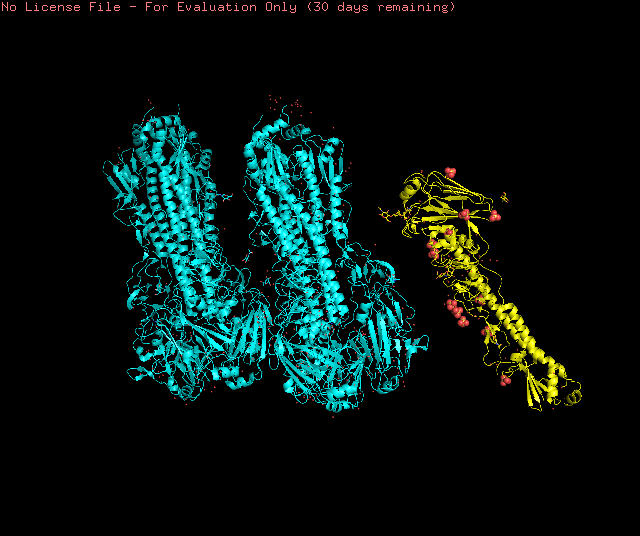

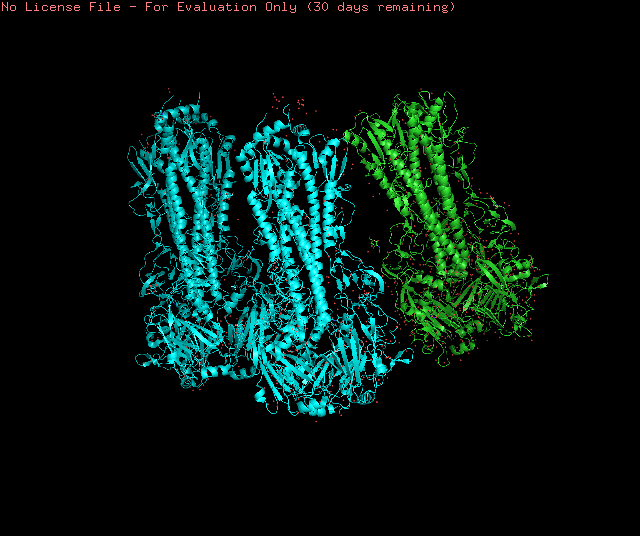

## Part 4: Data Analysis
In the heatmap, we can see the results of the sequence alignments. Along the diagonal from top left to bottom right are brighter colors, however this is the comparison between one of the sequences and itself. The human/human box is particularly bright because it is the longest sequence by several hundred residues. 

Looking at the next lightest squares, there are bat/swine, swine/human, and human/avian. In comparison, bat/avian is the darkest square, followed by swine/avian and bat/human. Relative to the self alignments, each species has one or potentially two other alignments with high scores. This suggests that were the viruses able to affect other species, it may occur in this order: bat > swine > human > avian, since bat is most similar to swine, which is most similar to human, which is most similar to avian. This makes sense due to there being historical events about the transmission of the swine influenza amongst humans. 

This data is also supported by the 3D visualizations from PyMol. In the second comparison between bat hemagglutinin and avian hemagglutinin, the structures seem vastly different. The bat hemagglutinin has a large volume of coils attached at one end by a more complex structure, while the avian hemagglutinin is not as dense, and has far fewer coils. These two sequences also had the lowest sequence alignment scores. 

In contrast, avian HA and human HA have more similar structures, as do bat HA and swine HA. In the first image with avian/human HA structures, human (right) appears to be slightly more complex in that it includes more coils that more closely resemble the mass in bat/swine HA. This is also consistent with the alignment scores as avian HA's highest alignment score is with human HA. In the third image with bat/swine HA, swine HA appears similar to one subunit of the bat HA. Once again this is consistent with the scoring, as bat HA has the highest alignment score with swine HA. 

### Hypothesis Interpretation and relation to literature
There have been several studies where swine influenza has been shown to recognize both human and avian hosts in some cases (Skehel and Wiley, 2000). Kida, Shortridge, and Webster (1988) found relationships between swine influenza and human and duck influenzas. Overall from these studies, it seems that some species swine influenza is likely able to infect at least human hosts. Based on this project, this conclusion also seems plausible due to the (relatively, in relation to self alignment) high alignment score between this swine hemagglutinin and human hemagglutinin sequences. The structures are different, but share some features. 

Meanwhile, for bat influenza, the H17N10 strain was shown to have a drastically different subunits from other influenzas, and thus would not be able to bind in other hosts (Zhu et al, 2013). While the sequence alignment here shows that it is similar to swine HA, the 3D structure reveals that H17 bat HA has multiple subunits, which is where it differs significantly from the other structures analyzed in this project. This is consistent with the idea that it would not be able to bind in other hosts.

However, from the BLAST search for the bat influenza, some of the notable hits include swine from Brazil and chicken from China. These have alignment scores of 269 and 262 respectively, with about 70% percent identity. It is possible that this is not enough similarity for the binding to occur, but as these are the first non-bat species in the BLAST search, it is worth researching.

Finally, quails have been found to be capable of hosting both avian and human influenzas, with pigs also being a potential intermediate host (Wan and Perez, 2006). In this project, swine, human, and avian influenzas have shown to be relatively similar in sequence and structure, so the proposition from the study that quails can spread avian influenza in humans (or vice versa) is plausible.

As the analysis in this project is fairly consistent with literature, my hypothesis seems to be conditionally correct that generally, the sequence/structure similarities can indicate whether the virus can infect other species. The exception is the bat influenza, due to its multiple subunits, which research has shown cannot infect other species easily despite the sequence/structure similarities.

## References
#### Literature
John J. Skehel and Don C. Wiley (2000) RECEPTOR BINDING AND MEMBRANE FUSION IN VIRUS ENTRY: The Influenza Hemagglutinin. Annu. Rev. Biochem. 2000. 69:531–69 https://www.annualreviews.org/doi/10.1146/annurev.biochem.69.1.531?url_ver=Z39.88-2003 

Hiroshi Kida, Kennedy F. Shortridge, Robert G.Webster (1988) Origin of the hemagglutinin gene of H3N2 influenza viruses from pigs in China. Virology 162:160-166 https://www.sciencedirect.com/science/article/abs/pii/0042682288904059?via%3Dihub

Xueyong Zhu, Wenli Yu, Ryan McBride, Yan Li, Li-Mei Chen, Ruben O. Donis, Suxiang Tong, James C. Paulson, and Ian A. Wilson (2013) Hemagglutinin homologue from H17N10 bat influenza virus exhibits divergent receptor-binding and pH-dependent fusion activities. PNAS 110 (4) 1458-1463 https://www.pnas.org/content/110/4/1458

Hongquan Wan, Daniel R. Perez (2006) Quail carry sialic acid receptors compatible with binding of avian and human influenza viruses. Virology. 346: 415–418. https://www.sciencedirect.com/science/article/pii/S0042682205007324

#### Code
Editing matplotlib heat plots: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

Information on pairwise alignments: https://towardsdatascience.com/pairwise-sequence-alignment-using-biopython-d1a9d0ba861f

PyMOL tutorial: https://pymolwiki.org/index.php/Practical_Pymol_for_Beginners

BLAST tutorial: https://biopython-tutorial.readthedocs.io/en/latest/notebooks/07%20-%20Blast.html

Challenge Problems 3, 4 from BIMM 143 FA21 Canvas

#### Data

Sequences: 
1. https://www.ncbi.nlm.nih.gov/Structure/pdb/2YP7 

2. https://www.ncbi.nlm.nih.gov/Structure/pdb/4H32 

3. https://www.ncbi.nlm.nih.gov/Structure/pdb/4BSI 

4. https://www.ncbi.nlm.nih.gov/Structure/pdb/1RUY

Structures:

1. https://www.rcsb.org/structure/2YP7

2. https://www.rcsb.org/structure/4H32

3. https://www.rcsb.org/structure/4BSI

4. https://www.rcsb.org/structure/1RUY